In [1]:
import matplotlib.pyplot as plt
import re
import math

In [2]:
def get_data(file):
    # Returns sizes of cache, miss rates.
    sizes = []
    miss_rates = []
    with open(file, 'r') as f:
        for line in f:
            if "capacity" in line:
                beg = re.search(r"\d", line).start()
                end = line.index("B")
                sizes.append(math.log(int(line[beg:end]), 2))
            if "miss_rate" in line:
                beg = re.search(r"\d", line).start()
                miss_rates.append(float(line[beg:]))
    return sizes, miss_rates

In [3]:
def plot_miss(x, y, z, t):
    plt.plot(x, y, color='b', label='Direct-mapped cache')
    plt.plot(z, t, color='#FFA500', label='Two-way set associative cache')
    plt.xlabel("Cache Capacity (2^x Bytes)")
    plt.ylabel("Cache Miss Rate (%)")
    plt.title("Cache Size vs. Miss Rate")
    plt.legend()
    plt.show()

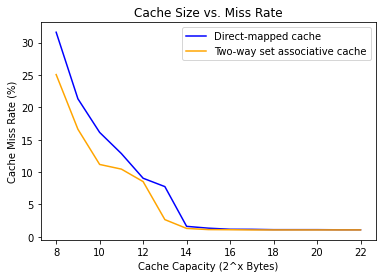

In [4]:
if __name__ == "__main__":
    sizes_direct, miss_rates_direct = get_data("logdirect.txt")
    sizes_two_way, miss_rates_two_way = get_data("log2way.txt")
    plot_miss(sizes_direct, miss_rates_direct, sizes_two_way, miss_rates_two_way)